# Database Management, Fall 2023 HW1
B11705009 An-Che Liang

## Part 1:

In [2]:
import pandas as pd

df = pd.read_excel("Bike.xlsx")
df.head()

,instant,date,year,season,month,weekday,holiday,workday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
0,1,2011-01-01,2011,1,1,6,0,0,2,14.11,18.18,80.58,5.94,331,654,985
1,2,2011-01-02,2011,1,1,0,0,0,2,14.90,17.69,69.61,9.20,131,670,801
2,3,2011-01-03,2011,1,1,1,0,1,1,8.05,9.47,43.73,9.19,120,1229,1349
3,4,2011-01-04,2011,1,1,2,0,1,1,8.20,10.61,59.04,5.93,108,1454,1562
4,5,2011-01-05,2011,1,1,3,0,1,1,9.31,11.46,43.70,6.92,82,1518,1600


### Section (a)

In [3]:
for weathersit_code in [1, 2, 3]:
    subset_df = df[df["weathersit"] == weathersit_code]
    print(
        f"weathersit={weathersit_code}, days={len(subset_df)}, mean temperture={subset_df['temp'].mean()}, mean cnt={subset_df['cnt'].mean()}")

weathersit=1, days=463, mean temperture=20.973542116630668, mean cnt=4876.7861771058315
weathersit=2, days=247, mean temperture=19.285263157894732, mean cnt=4035.862348178138
weathersit=3, days=21, mean temperture=17.77047619047619, mean cnt=1803.2857142857142


### Section (b)

In [4]:
for weathersit_code in [1, 2, 3]:
    for work_status in [0, 1]:
        weather_condition = df["weathersit"] == weathersit_code
        work_condition = df["workday"] == work_status
        subset_df = df[weather_condition & work_condition]
        print(
            f"weathersit={weathersit_code} workday={work_status}, days={len(subset_df)}, mean temperture={subset_df['temp'].mean()}, mean cnt={subset_df['cnt'].mean()}")

weathersit=1 workday=0, days=156, mean temperture=20.193076923076923, mean cnt=4587.2692307692305
weathersit=1 workday=1, days=307, mean temperture=21.370130293159608, mean cnt=5023.902280130294
weathersit=2 workday=0, days=70, mean temperture=18.993000000000002, mean cnt=3936.8285714285716
weathersit=2 workday=1, days=177, mean temperture=19.40084745762712, mean cnt=4075.0282485875705
weathersit=3 workday=0, days=5, mean temperture=15.592000000000002, mean cnt=1815.4
weathersit=3 workday=1, days=16, mean temperture=18.451249999999998, mean cnt=1799.5


### Section (c)

In [5]:
for year in [2011,  2012]:
    time_condition = df["year"] == year
    humidity_condition = (df["humidity"] >= 30) & (df["humidity"] <= 60)
    cnt_condition = (df["cnt"] >= 3000) & (df["cnt"] <= 6000)
    subset_df = df[time_condition & humidity_condition & cnt_condition]
    print(
        f"There are {len(subset_df)} days in year {year} that satisfy the condition.")

There are 81 days in year 2011 that satisfy the condition.
There are 79 days in year 2012 that satisfy the condition.


## Part2:
### Section (a)

[1, 3, 4, 12, 5, 6, 9, 18, 27, 33, 15, 7, 20]


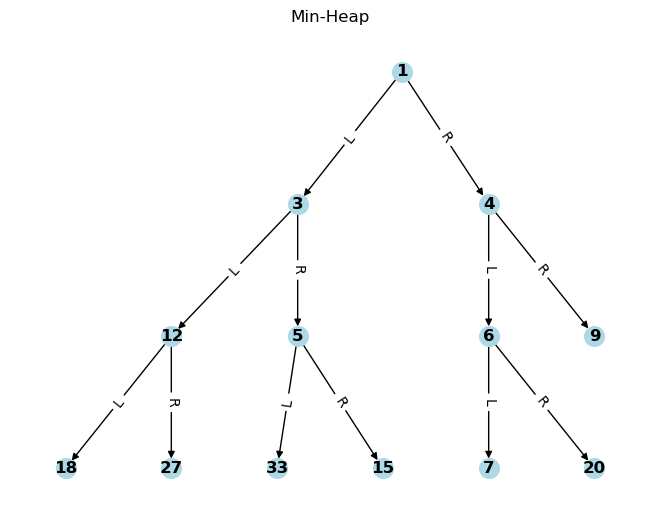

In [1]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt

heap = [1, 15, 6, 18, 3, 7, 9, 12, 27, 33, 5, 4, 20]
heapq.heapify(heap)
print(heap)


def show_heap(heap, title):

    nx_graph = nx.DiGraph()
    # Add nodes to the graph
    for index, value in enumerate(heap):
        nx_graph.add_node(index, value=value)

    # Add edges to represent the parent-child relationships
    for index in range(len(heap)):
        if 2 * index + 1 < len(heap):
            nx_graph.add_edge(index, 2 * index + 1, label='L')
        if 2 * index + 2 < len(heap):
            nx_graph.add_edge(index, 2 * index + 2, label='R')

    # Create a plot of the heap structure
    # Adjust the layout algorithm as needed
    pos = nx.nx_agraph.graphviz_layout(nx_graph , prog="dot")
    labels = {i: nx_graph.nodes[i]['value'] for i in nx_graph.nodes}
    nx.draw(nx_graph, pos, with_labels=True, labels=labels, node_size=200,
            node_color='lightblue', font_size=12, font_weight='bold')
    edge_labels = {(i, j): nx_graph[i][j]['label'] for i, j in nx_graph.edges}
    nx.draw_networkx_edge_labels(
        nx_graph, pos, edge_labels=edge_labels, font_size=10)

    plt.title(title)
    plt.axis('off')
    plt.show()

show_heap(heap , "Min-Heap")

### Section (b)

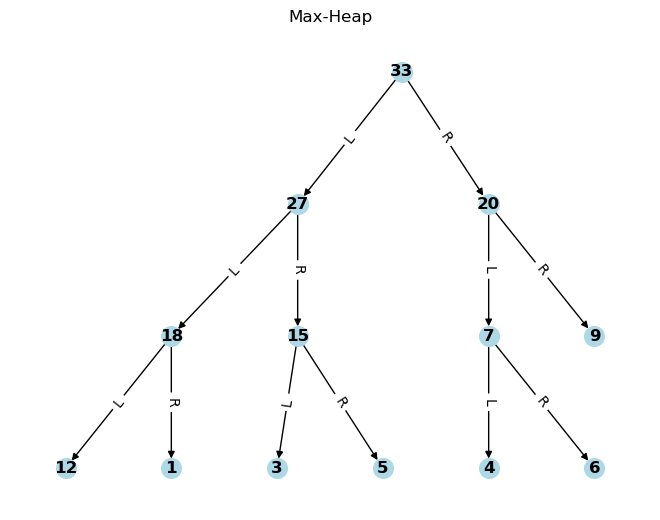

In [2]:
heap = [1, 15, 6, 18, 3, 7, 9, 12, 27, 33, 5, 4, 20]
heapq._heapify_max(heap)
show_heap(heap , "Max-Heap")

### Section (c)

To store a min-heap inside an array or list, for any element at index $i$, store the left child elememt at index $2i+1$ and the right child at index $2i+2$, then we can access the parent node at index $\frac{i-1}{2}$. In this way, we can preserve the edge relationship of the heap inside an array with index value. The values inside the array at section(a) are:
$$
\begin{bmatrix}
    1&3&4&12&5&6&9&18&27&33&15&7&20
\end{bmatrix}
$$


## Part 3:

### Section (a)

Answer: iii. 不同的執行緒共享同一塊記憶體空間，而不同的行程各自有自己的記憶體空間。

Different threads shares the same memory space, while different process are isolated from each other. 

### Section (b)

Answer: ii. 儲存一個檔案的複數個區塊都落在相鄰的磁碟空間中。

By definition, contiguous disk allocation means each file occupies a contiguous set of blocks on the disk.

### Section (c)

Answer: v. 以上皆非。

Virtual memory is a technique used by the operating system to provide a abstract layer of memory to applications so that applications can have its own independent address space. All the other statements are not the correct description.

### Section (d)

Answer: iii. Disc management

The Operating System Course offered by the Information Management department (IM2003) does not cover topics about disc management.